# Calculator class

In [1]:
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline  

In [3]:
print("Hello World")

Hello World


In [5]:
import pandas as pd
from scipy.optimize import curve_fit

In [6]:
class calculator:
    # initialize function setting paramters a and b with defaults, and the x values for the linear function
    def __init__(self,a_=1,b_=1):
        self.a = a_
        self.b = b_
        self.myX = np.linspace(0,20,21)
        
    # function to perform addition
    def add(self):
        return self.a + self.b
    
    # function to perform substraction
    def sub(self):
        return self.a - self.b
    
    # function to perform multiplication
    def mult(self):
        return self.a * self.b
    
    # fit function to be used next
    def simpleLinearFunction(self,x, a, b):
        return a*x + b
    
    # function to calculate linear function from parameters a and b
    def getLinear(self):
        return self.simpleLinearFunction(self.myX, self.a, self.b)
    
    # function to write out the linear function obtained with a and b
    def writeLinear(self, fname= "pd_calculator.dat" ):
        # prepare data
        writeData = np.transpose(np.vstack((self.myX,self.getLinear())))
        
        # how to simply write out files with pandas
        linearWriter = pd.DataFrame(data = writeData,columns = ["# x","ax+b"])
        linearWriter.to_csv(fname, sep = '\t', index = False, float_format = "%.3f")
        
        #how to write out files with numpy
        #np.savetxt("linearFunction_np.dat", writeData, delimiter = '\t',header = "x\tax+b",fmt = "%.3f")
        
        return True
    
    # function to read in the linear function
    def readLinear(self, fn = "pd_calculator.dat"):
        # read in data using pandas:
        readData = pd.read_csv(fn, delimiter = '\t')
        x = readData.values[:,0]
        y = readData.values[:,1]
        
        # read in data using numpy:
        #readData = np.loadtxt(fn, delimiter = '\t')
        #x = readData[:,0]
        #y = readData[:,1]
        print(readData, x, y)
        
        # run the fit with x and y
        popt, pcov = curve_fit(self.simpleLinearFunction, x, y)
        self.a = popt[0]
        self.b = popt[1]
        
        # sanity check
        if( (self.getLinear() == y).all ):
            return True
        else:
            return False

In [7]:
# run some test output
test = calculator()
print("Results of the test instance")
print("a=",test.a,"b=",test.b,)
print("a+b=", test.add())
print("a-b=", test.sub())
print("a*b=", test.mult())
simon = calculator(4,2)
print("Results of the simon instance")
print("a=",simon.a,"b=",simon.b,)
print("a+b={:2}".format(simon.add()))
print("a-b=", simon.sub())
print("a*b=", simon.mult())
#print(np.transpose(np.vstack((simon.myX,simon.getLinear()))))
simon.writeLinear()
simon.readLinear()

Results of the test instance
a= 1 b= 1
a+b= 2
a-b= 0
a*b= 1
Results of the simon instance
a= 4 b= 2
a+b= 6
a-b= 2
a*b= 8
     # x  ax+b
0    0.0   2.0
1    1.0   6.0
2    2.0  10.0
3    3.0  14.0
4    4.0  18.0
5    5.0  22.0
6    6.0  26.0
7    7.0  30.0
8    8.0  34.0
9    9.0  38.0
10  10.0  42.0
11  11.0  46.0
12  12.0  50.0
13  13.0  54.0
14  14.0  58.0
15  15.0  62.0
16  16.0  66.0
17  17.0  70.0
18  18.0  74.0
19  19.0  78.0
20  20.0  82.0 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.] [ 2.  6. 10. 14. 18. 22. 26. 30. 34. 38. 42. 46. 50. 54. 58. 62. 66. 70.
 74. 78. 82.]


True

     # x  ax+b
0    0.0   7.0
1    1.0  10.0
2    2.0  13.0
3    3.0  16.0
4    4.0  19.0
5    5.0  22.0
6    6.0  25.0
7    7.0  28.0
8    8.0  31.0
9    9.0  34.0
10  10.0  37.0
11  11.0  40.0
12  12.0  43.0
13  13.0  46.0
14  14.0  49.0
15  15.0  52.0
16  16.0  55.0
17  17.0  58.0
18  18.0  61.0
19  19.0  64.0
20  20.0  67.0 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.] [ 7. 10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40. 43. 46. 49. 52. 55. 58.
 61. 64. 67.]


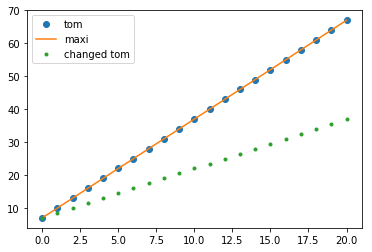

In [8]:
#start with tom
tom = calculator(3,7)
plot(tom.myX, tom.getLinear(),'o', label = "tom")
tom.writeLinear("TomsFile.dat")

# maxi reads toms data
maxi = calculator()
maxi.readLinear("TomsFile.dat")
plot(maxi.myX, maxi.getLinear(),'-', label = "maxi")

# change tom
tom.a=1.5
plot(tom.myX, tom.getLinear(),'.', label = "changed tom")

legend(loc="best")
show()